In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

In [64]:
url = "https://raw.githubusercontent.com/satyam2201/IME672/main/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# number of row and col
df.shape

(7043, 21)

In [67]:
#number of missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
# df['Churn'] = df['Churn'].map(lambda x: 1 if x == 'Yes' else 0)
# df['Churn'] = df['Churn'].astype(int)

gender
Male      3555
Female    3488
dtype: int64


<Axes: xlabel='gender'>

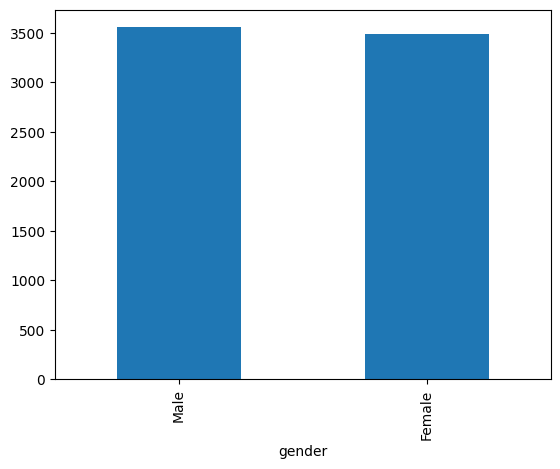

In [70]:
print(df.value_counts('gender'))
df.value_counts('gender').plot(kind='bar')

NonSenior Citizen  :  5901
Senior Citizen     :  1142


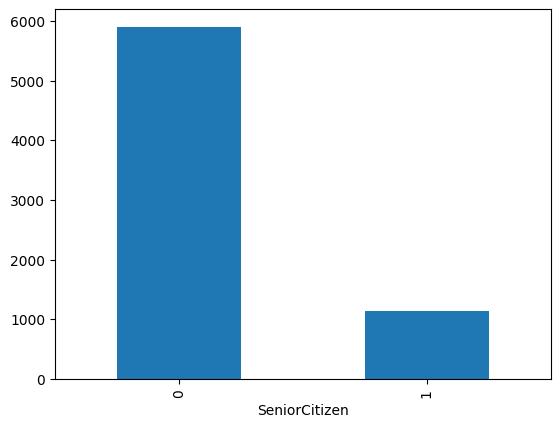

In [71]:
df.value_counts('SeniorCitizen').plot(kind='bar')
print("NonSenior Citizen  : ",df.value_counts('SeniorCitizen')[0])
print("Senior Citizen     : ",df.value_counts('SeniorCitizen')[1])

No     5174
Yes    1869
Name: Churn, dtype: int64


<Axes: >

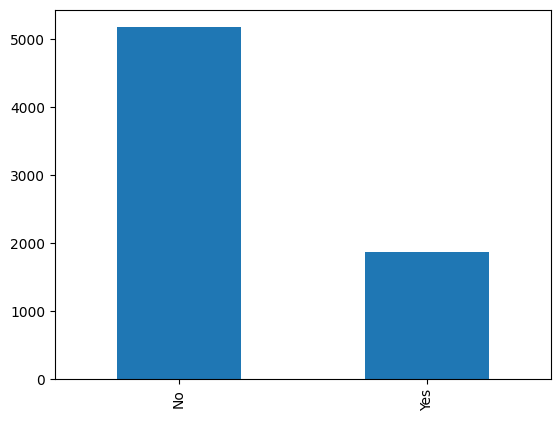

In [72]:
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='bar')

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


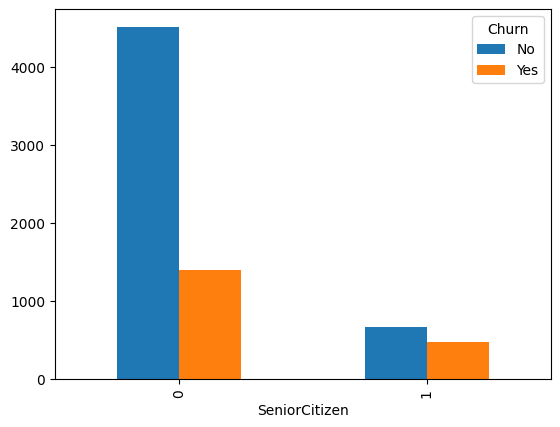

In [73]:
pd.crosstab(df['SeniorCitizen'],df['Churn']).plot(kind='bar')
print(pd.crosstab(df['SeniorCitizen'],df['Churn']))

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


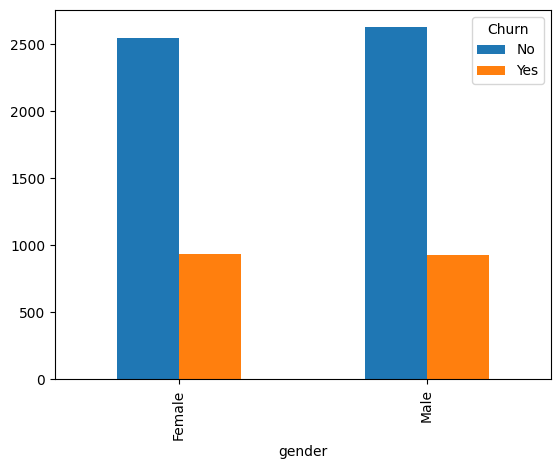

In [74]:
pd.crosstab(df['gender'],df['Churn']).plot(kind='bar')
print(pd.crosstab(df['gender'],df['Churn']))

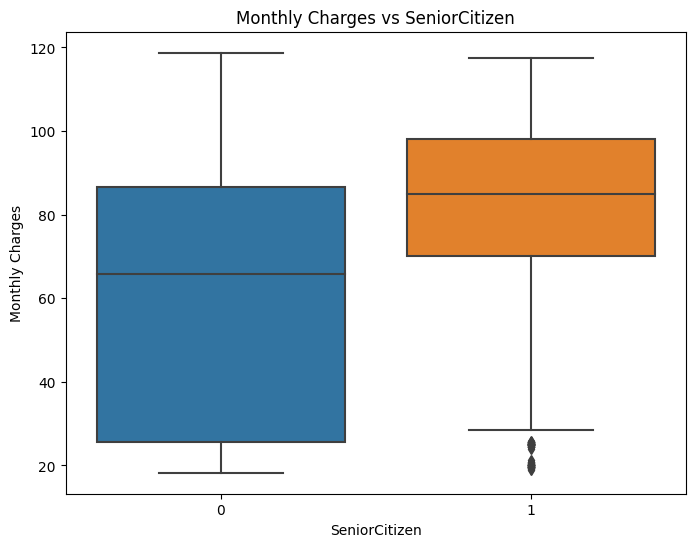

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SeniorCitizen', y='MonthlyCharges')
plt.title('Monthly Charges vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Monthly Charges')
plt.show()

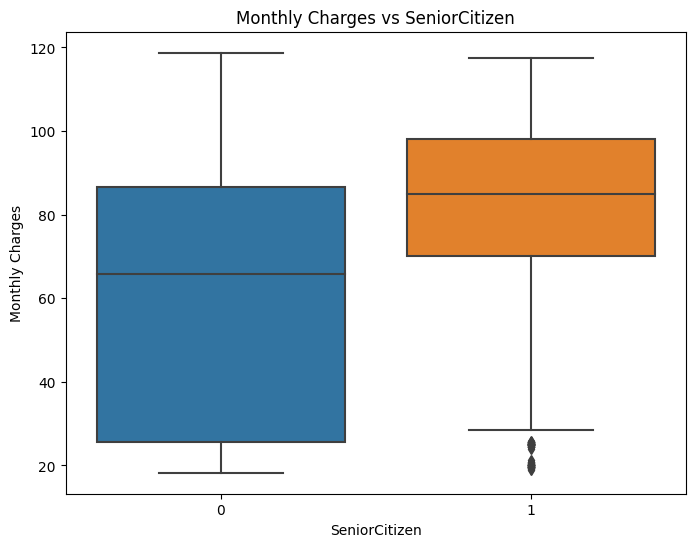

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SeniorCitizen', y='MonthlyCharges')
plt.title('Monthly Charges vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Monthly Charges')
plt.show()

In [77]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

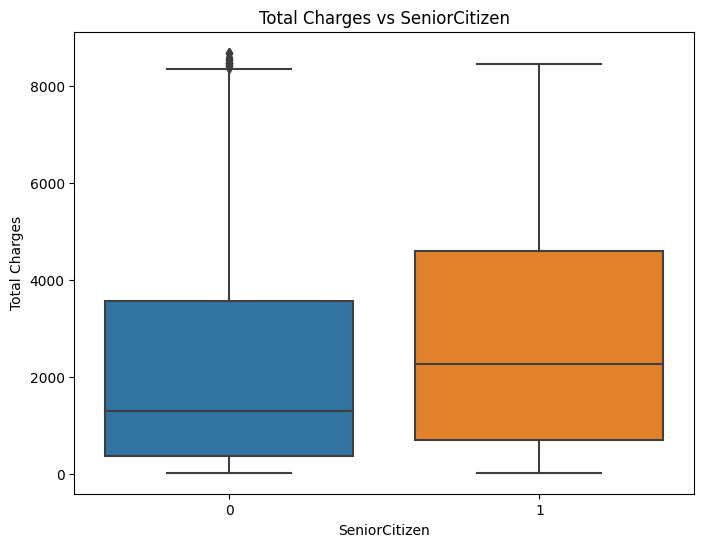

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SeniorCitizen', y='TotalCharges')
plt.title('Total Charges vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Total Charges')
plt.show()

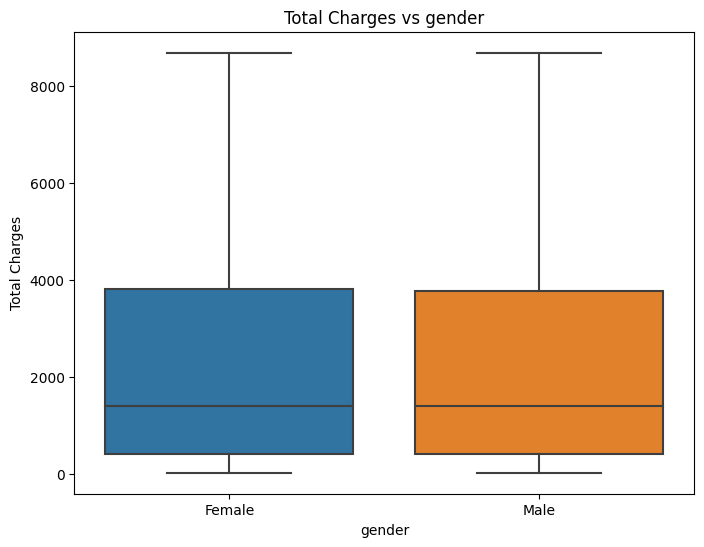

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='TotalCharges')
plt.title('Total Charges vs gender')
plt.xlabel('gender')
plt.ylabel('Total Charges')
plt.show()

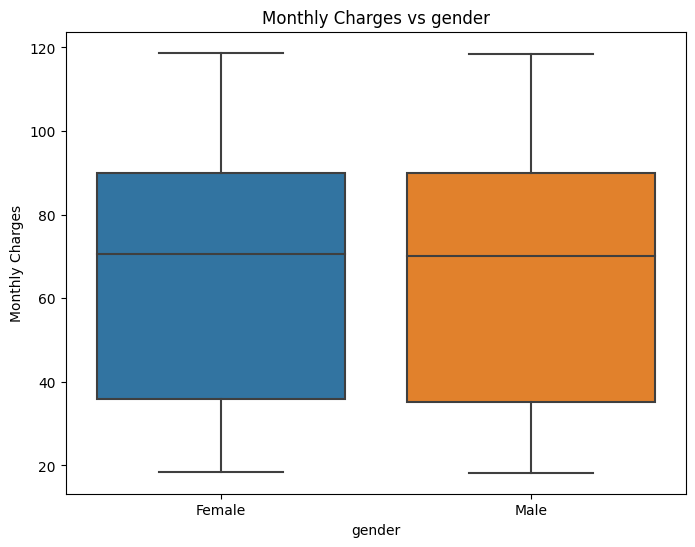

In [80]:
# Monthly Charges Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='MonthlyCharges')
plt.title('Monthly Charges vs gender')
plt.xlabel('gender')
plt.ylabel('Monthly Charges')
plt.show()

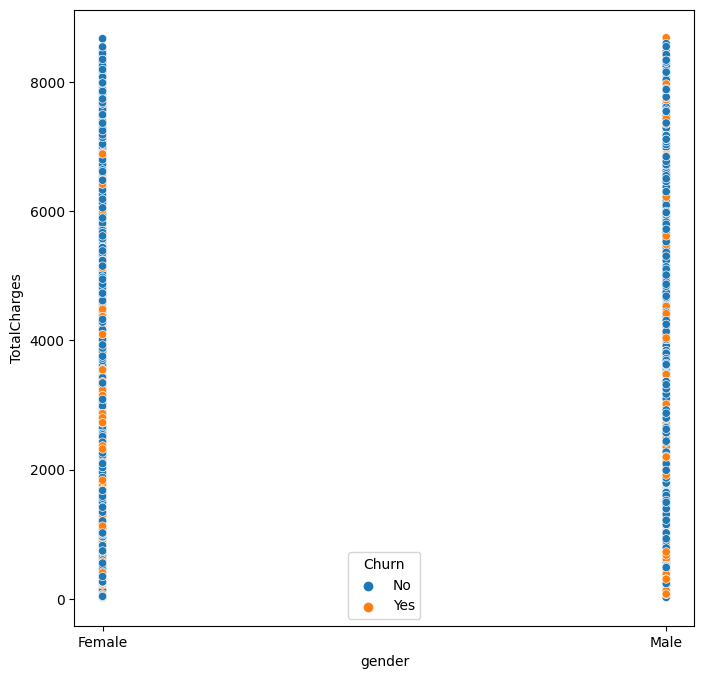

In [81]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='gender', y='TotalCharges', hue='Churn')
plt.show()

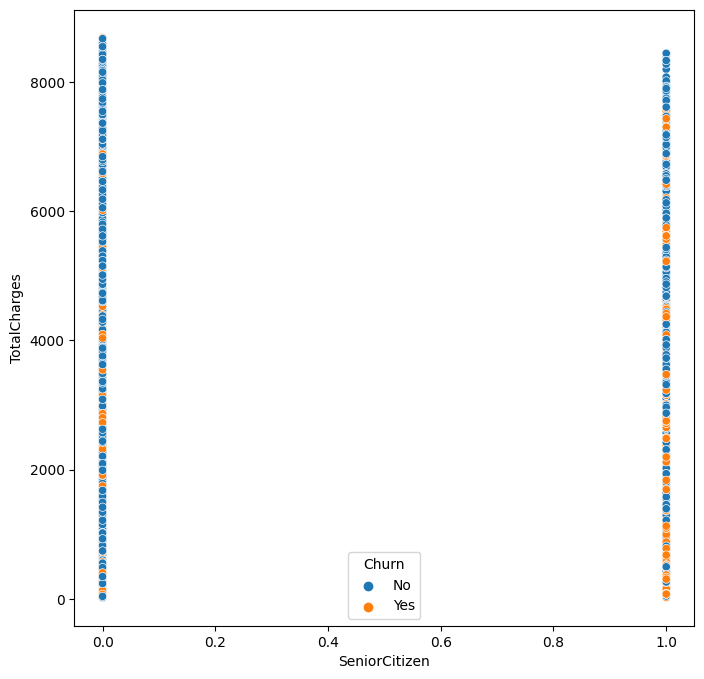

In [82]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, y='TotalCharges', x='SeniorCitizen', hue='Churn')
plt.show()

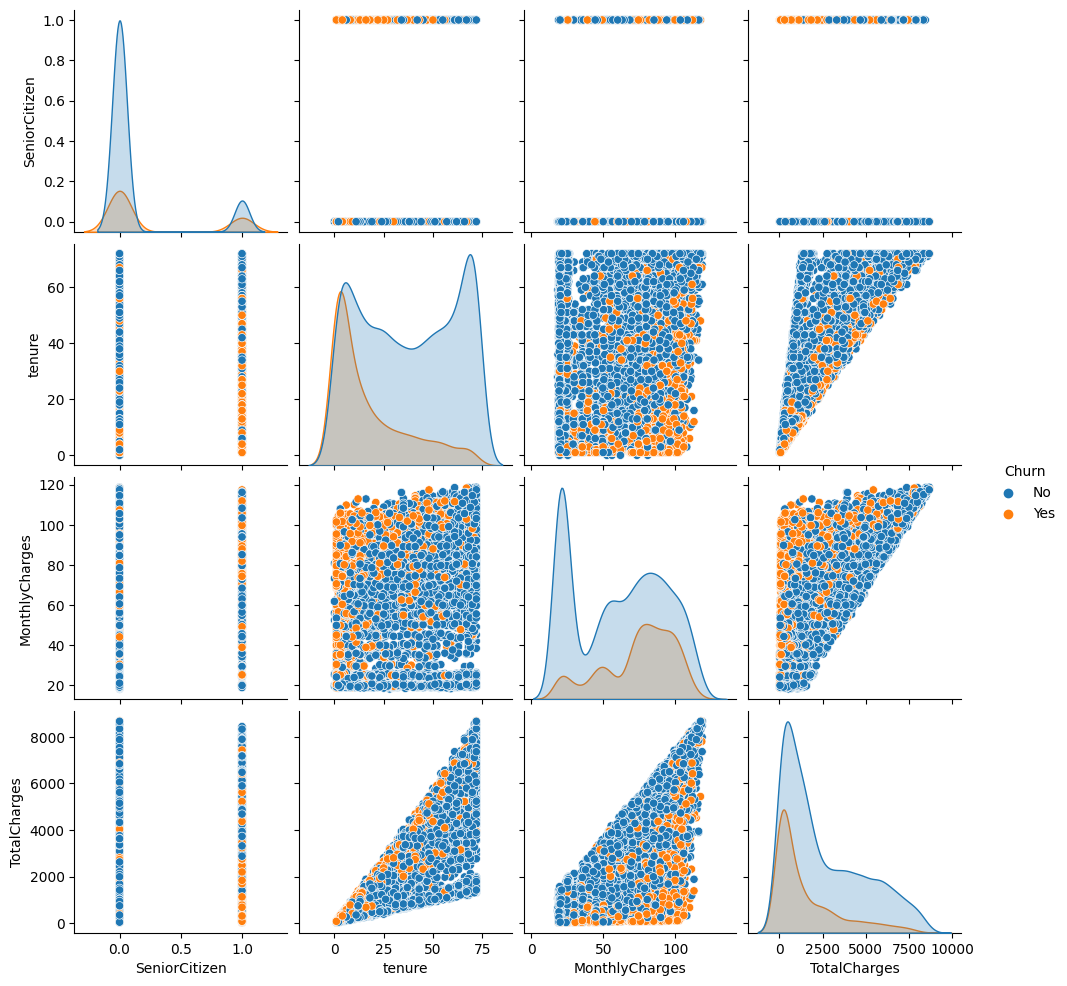

In [83]:
sns.pairplot(data=df,hue='Churn')

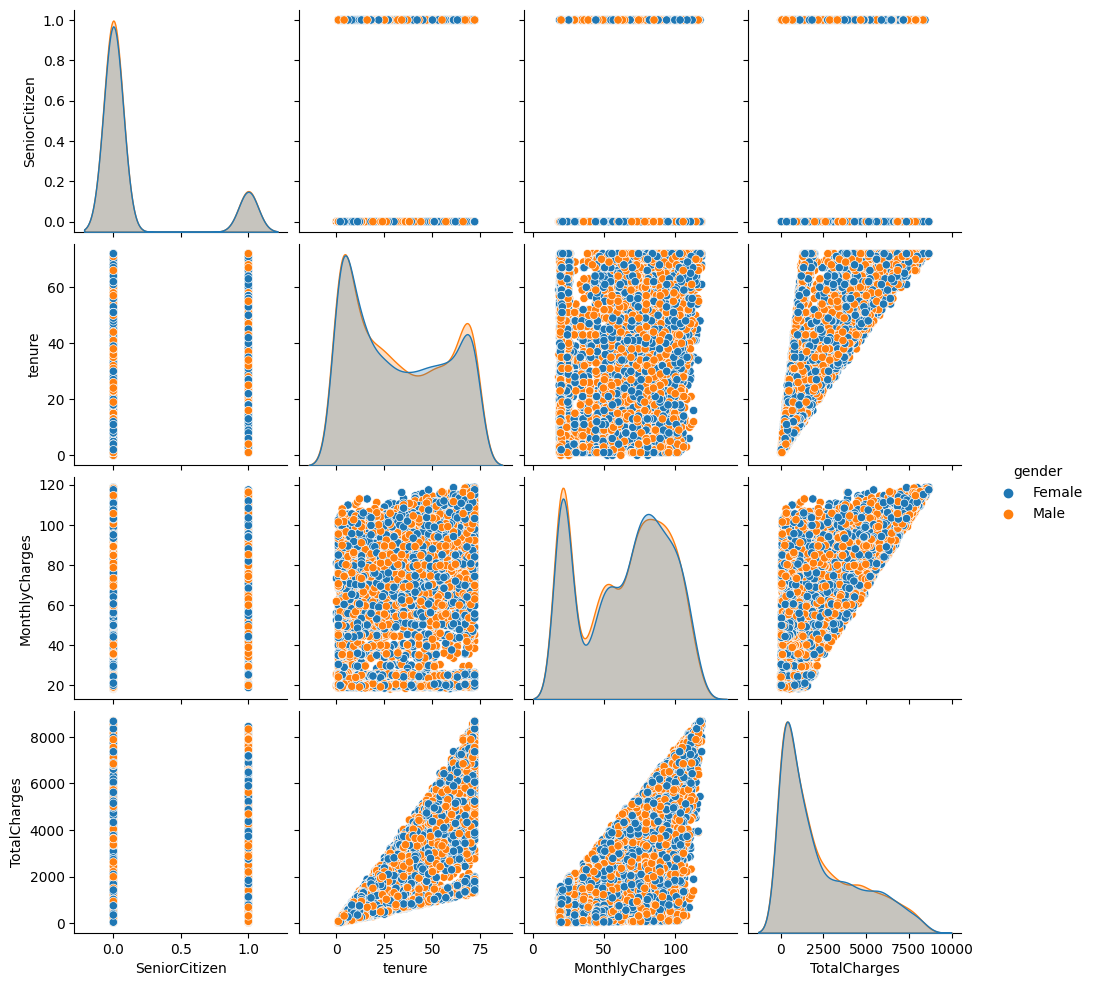

In [87]:
sns.pairplot(data=df,hue='gender')

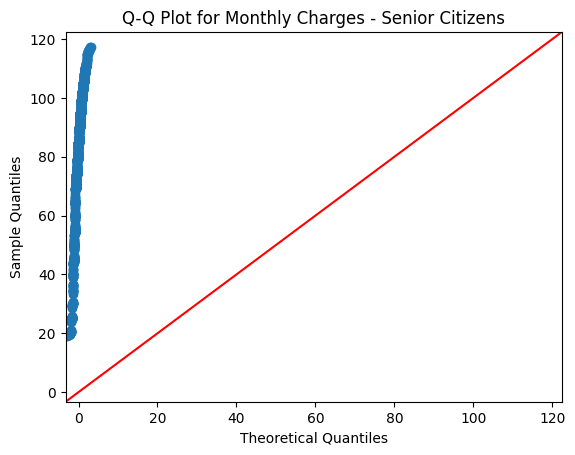

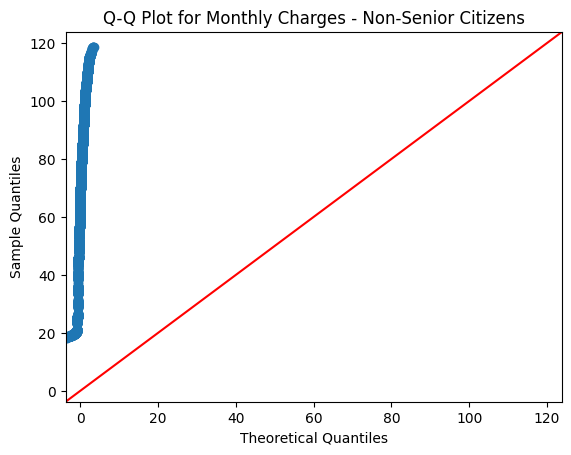

In [88]:
senior_citizens = df[df['SeniorCitizen'] == 1]
non_senior_citizens = df[df['SeniorCitizen'] == 0]

# Q-Q plot for senior citizens
sm.qqplot(senior_citizens['MonthlyCharges'], line='45')
py.title("Q-Q Plot for Monthly Charges - Senior Citizens")


# Q-Q plot for non-senior citizens
sm.qqplot(non_senior_citizens['MonthlyCharges'], line='45')
py.title("Q-Q Plot for Monthly Charges - Non-Senior Citizens")
plt.show()

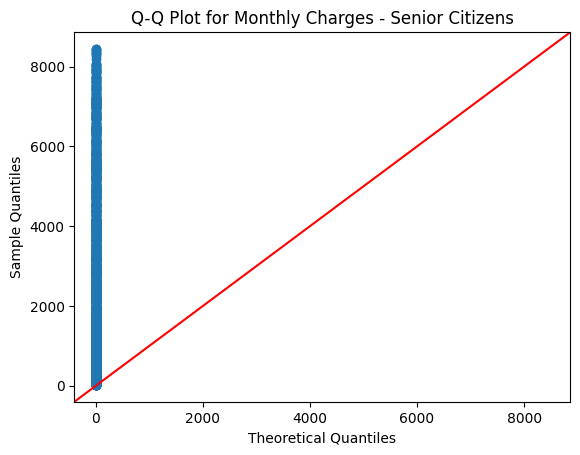

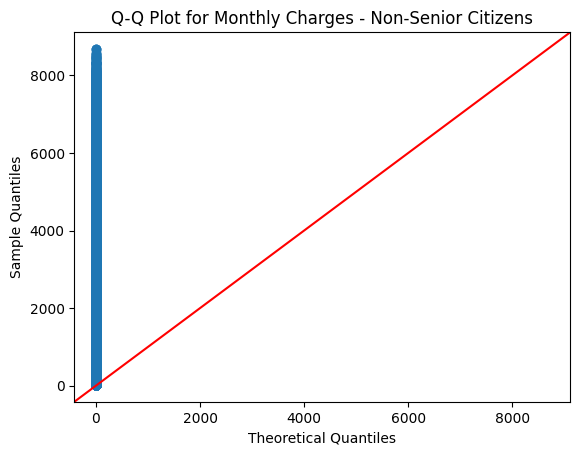

In [89]:
senior_citizens = df[df['SeniorCitizen'] == 1]
non_senior_citizens = df[df['SeniorCitizen'] == 0]

# Q-Q plot for senior citizens
sm.qqplot(senior_citizens['TotalCharges'], line='45')
py.title("Q-Q Plot for Monthly Charges - Senior Citizens")


# Q-Q plot for non-senior citizens
sm.qqplot(non_senior_citizens['TotalCharges'], line='45')
py.title("Q-Q Plot for Monthly Charges - Non-Senior Citizens")
plt.show()

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [86]:
df.corr()

<ipython-input-86-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000
